<a href="https://colab.research.google.com/github/Cazzarooo/An-lise-de-Dados-de-Vendas-de-Produtos/blob/main/An%C3%A1lise_de_Dados_de_Vendas_de_Produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# Configuração de estilo do Seaborn e matplotlib para gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# 2. Função para carregar os dados do arquivo CSV
def load_data():
    # Carrega o arquivo CSV gerado previamente
    df = pd.read_csv('sales_data_example.csv')
    return df

In [4]:
# 3. Função para limpar e preparar os dados
def clean_data(df):
    # Verificando e lidando com valores ausentes
    df = df.dropna()

    # Tratamento de outliers usando z-score (eliminação de outliers com desvio > 3)
    z_scores = np.abs(stats.zscore(df[['price', 'quantity_sold']]))
    df = df[(z_scores < 3).all(axis=1)]

    # Criando a coluna de faturamento (revenue)
    df['revenue'] = df['price'] * df['quantity_sold']
    return df

In [5]:
# 4. Função para análise exploratória de dados
def exploratory_data_analysis(df):
    # Descrição estatística do dataset
    print("Descrição Estatística do Dataset:")
    print(df.describe())

    # Análise de correlação
    correlation = df[['price', 'quantity_sold', 'revenue']].corr()
    print("\nMatriz de Correlação:")
    print(correlation)

In [6]:
# 5. Função para visualizações
def visualize_data(df):
    # Gráfico 1: Distribuição das vendas por categoria
    category_sales = df.groupby('category')['quantity_sold'].sum().reset_index()
    plt.figure()
    sns.barplot(x='category', y='quantity_sold', data=category_sales, palette='viridis')
    plt.title('Total de Vendas por Categoria')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade Vendida')
    plt.show()

    # Gráfico 2: Scatter plot de Preço vs Quantidade Vendida (incluindo tendência de regressão)
    plt.figure()
    sns.scatterplot(x='price', y='quantity_sold', hue='category', data=df, palette='deep')
    sns.regplot(x='price', y='quantity_sold', data=df, scatter=False, color='blue')
    plt.title('Preço vs Quantidade Vendida (Com Linha de Tendência)')
    plt.xlabel('Preço')
    plt.ylabel('Quantidade Vendida')
    plt.show()

    # Gráfico 3: Distribuição de Preços com KDE (Kernel Density Estimate)
    plt.figure()
    sns.histplot(df['price'], kde=True, color='orange')
    plt.title('Distribuição dos Preços dos Produtos')
    plt.xlabel('Preço')
    plt.ylabel('Frequência')
    plt.show()

    # Gráfico 4: Heatmap de correlação entre as variáveis numéricas
    correlation = df[['price', 'quantity_sold', 'revenue']].corr()
    plt.figure()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap de Correlação entre Variáveis')
    plt.show()

    # Gráfico 5: Faturamento total por categoria
    category_revenue = df.groupby('category')['revenue'].sum().reset_index()
    plt.figure()
    sns.barplot(x='category', y='revenue', data=category_revenue, palette='rocket')
    plt.title('Faturamento Total por Categoria')
    plt.xlabel('Categoria')
    plt.ylabel('Faturamento')
    plt.show()

In [7]:
# 6. Função para exportar relatórios e gráficos
def export_report(df):
    # Exportando resumo descritivo para CSV
    df.describe().to_csv('relatorio_descritivo.csv')

    # Salvando gráficos
    plt.figure()
    category_sales = df.groupby('category')['quantity_sold'].sum().reset_index()
    sns.barplot(x='category', y='quantity_sold', data=category_sales, palette='viridis')
    plt.title('Total de Vendas por Categoria')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade Vendida')
    plt.savefig('vendas_categoria.png')

Descrição Estatística do Dataset:
       product_id      price  quantity_sold       revenue
count  100.000000  100.00000     100.000000    100.000000
mean    50.500000   75.66120     127.520000  12338.358000
std     29.011492   47.40864      97.861527  14509.388996
min      1.000000    5.89000       1.000000     11.320000
25%     25.750000   41.15500      53.250000   2617.402500
50%     50.500000   65.65000     104.500000   7412.130000
75%     75.250000  105.33500     176.250000  15460.372500
max    100.000000  205.14000     400.000000  80414.880000

Matriz de Correlação:
                  price  quantity_sold   revenue
price          1.000000       0.585672  0.824404
quantity_sold  0.585672       1.000000  0.840636
revenue        0.824404       0.840636  1.000000


<ipython-input-6-3f10d0366d4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='quantity_sold', data=category_sales, palette='viridis')


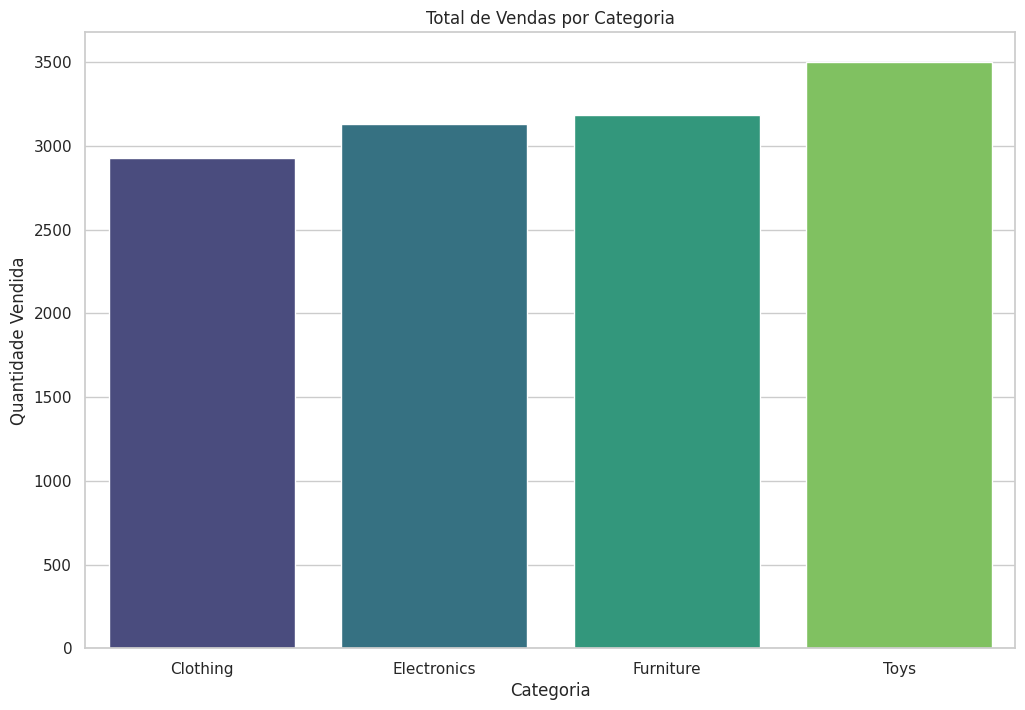

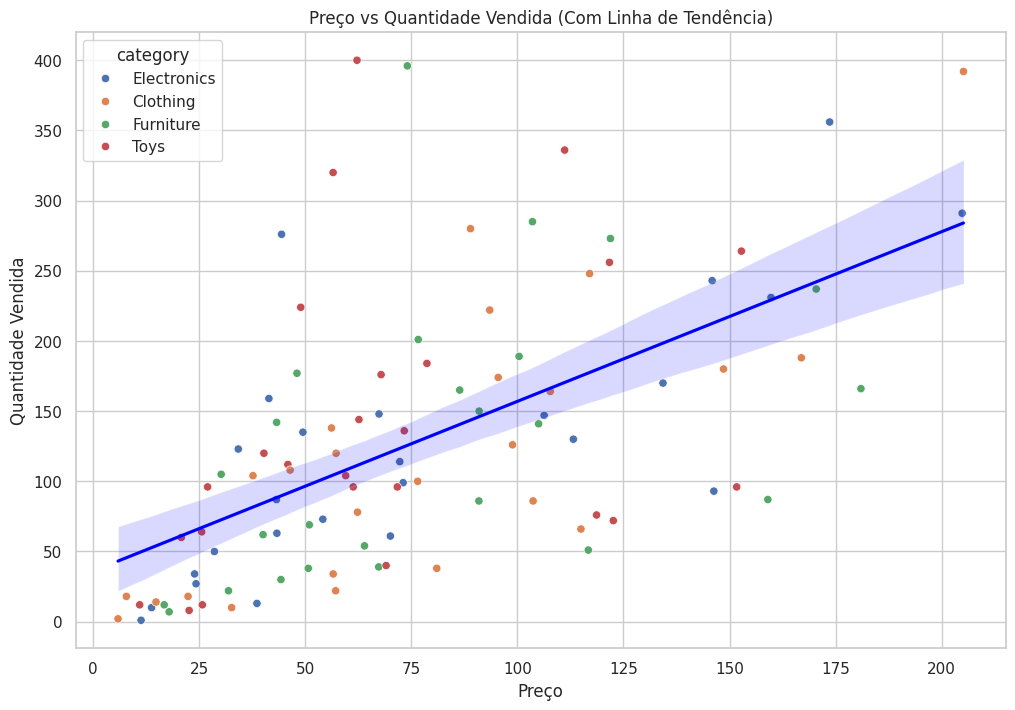

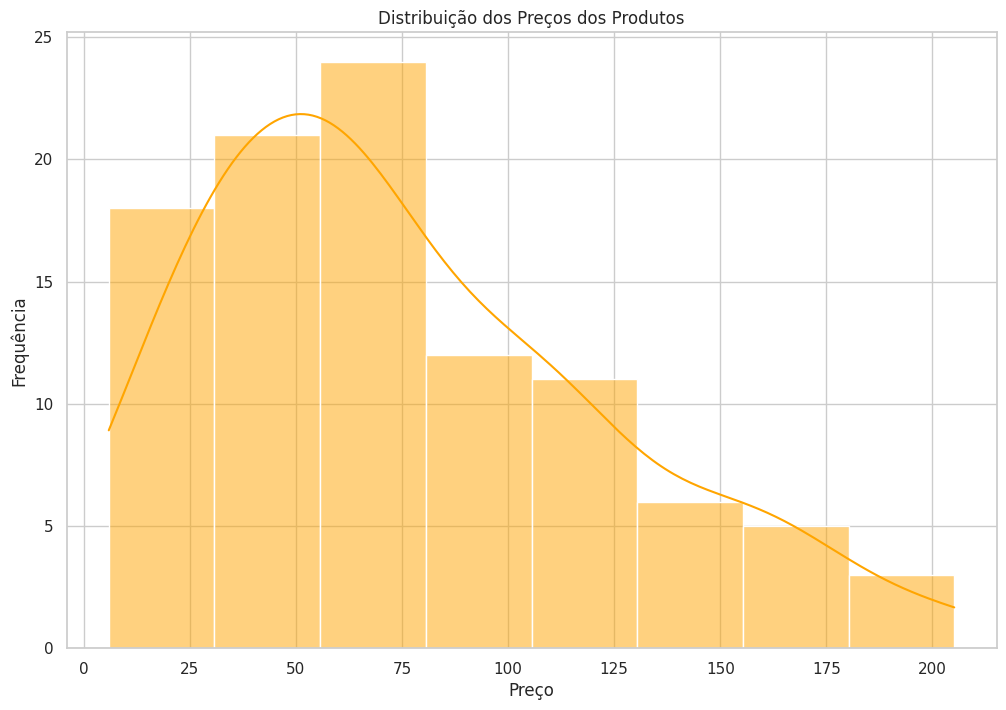

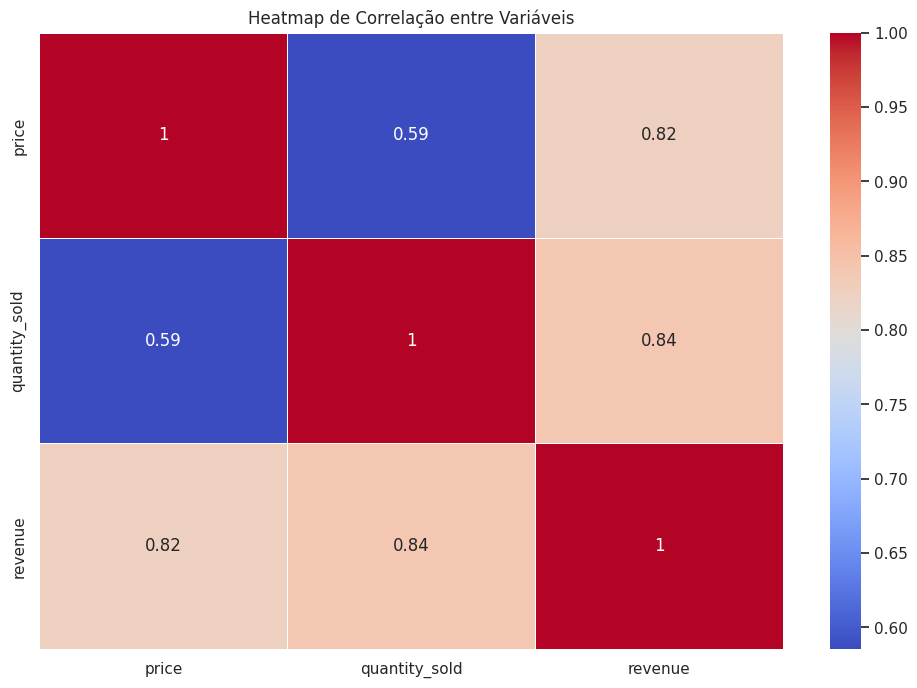

<ipython-input-6-3f10d0366d4f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='revenue', data=category_revenue, palette='rocket')


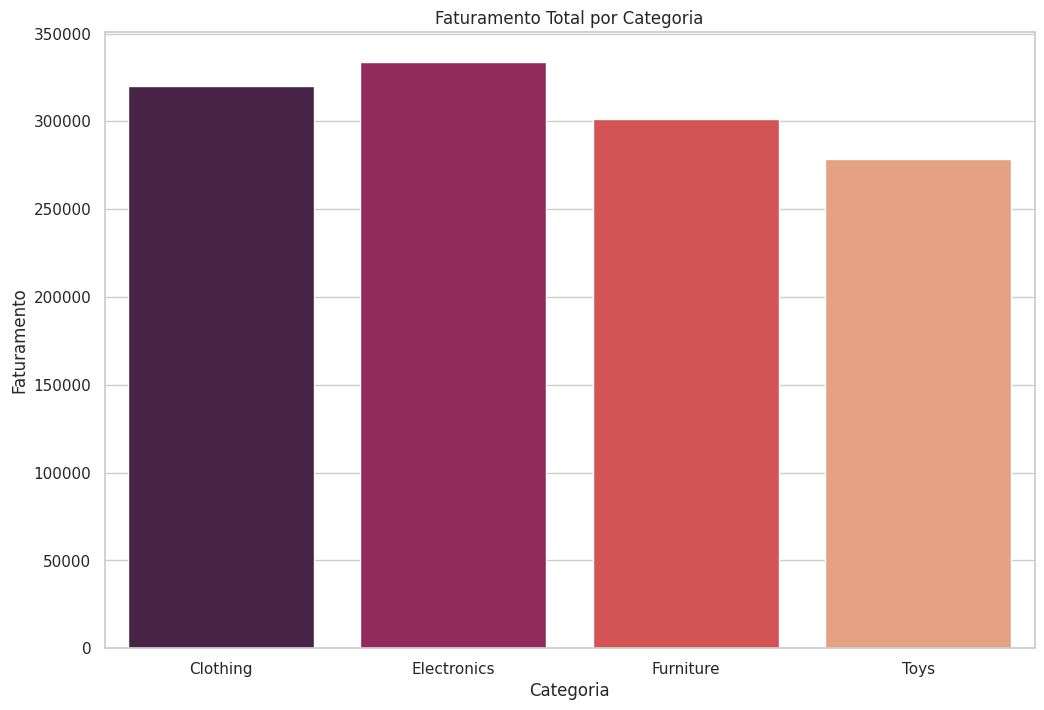

<ipython-input-7-acd5810f7de7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='quantity_sold', data=category_sales, palette='viridis')


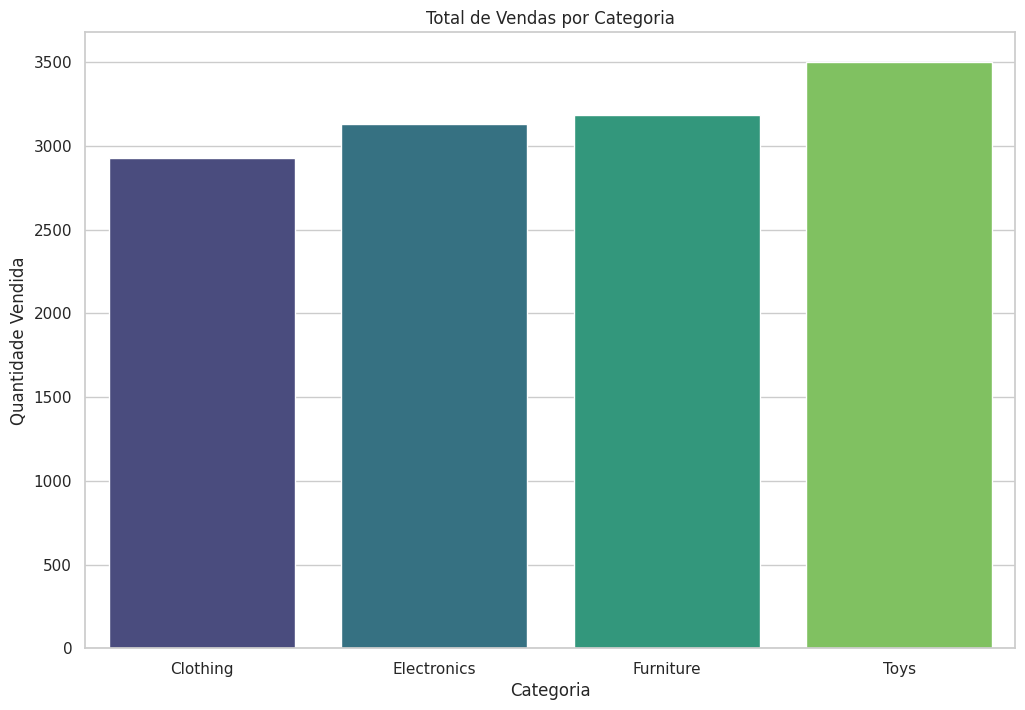

In [8]:
# 7. Função principal para rodar o pipeline
def run_pipeline():
    # Carregar dados
    df = load_data()

    # Limpeza e preparação dos dados
    df = clean_data(df)

    # Análise exploratória de dados
    exploratory_data_analysis(df)

    # Visualização de dados
    visualize_data(df)

    # Exportar relatórios e gráficos
    export_report(df)

# Executando o pipeline completo
run_pipeline()